# Complete end to end sklearn in details with a project

In [1]:
# Let's listify the contents
what_we_are_learning = [
    "01. Introduction to Scikit-Learn",
    "02. Getting the data ready",
    "03. Choose the right estimator/algorithm for our problem",
    "04. Fit the model/algorithm and use it to make predictions on our data",
    "05. Evaluating a model",
    "06. Improve a model",
    "07. Save and load a trained model",
    "08. Putting it all together",
]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1. Getting our data ready to be used with machine learning

Three main things: 
1. split the data into features and label (usually x and y)
2. filling(also called imputing) or disregarding missing values
3. converting non-numerical values to numerical value( also called feature encoding)


In [3]:
heart_disease = pd.read_csv("heart-disease.csv")

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 make sure it's all numerical 

In [9]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()
car_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [10]:
len(car_sales)

1000

In [11]:
# split the data
X = car_sales.drop("Price", axis=1)

y = car_sales["Price"]

In [12]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# build ml model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [14]:
# turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


### how its worked:

"Make" column: <br>
Unique values: Toyota, Honda, BMW, Nissan <br>
Creates 4 binary columns (0-3) <br>
For example, if a car is Toyota, it will have [1,0,0,0], if Honda [0,1,0,0], etc. <br> <br>
"Colour" column: <br>
Unique values: White, Red, Blue, Black, Green <br>
Creates 5 binary columns (4-8) <br>
For example, if a car is White, it will have [1,0,0,0,0], if Red [0,1,0,0,0], etc. <br> <br>
"Doors" column: <br>
Unique values: 3, 4, 5 <br>
Creates 3 binary columns (9-11) <br>
For example, if a car has 3 doors, it will have [1,0,0], if 4 doors [0,1,0], etc. <br>

In [17]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [18]:
# lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### What if there were missing values?
1. fill them with some value (also know as imputing)
2. remove the samples with missing data altogather

In [19]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [20]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [22]:
# lets turn the features into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5000 stored elements and shape (1000, 17)>

In [23]:
pd.DataFrame(transformed_X)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
995,<Compressed Sparse Row sparse matrix of dtype ...
996,<Compressed Sparse Row sparse matrix of dtype ...
997,<Compressed Sparse Row sparse matrix of dtype ...
998,<Compressed Sparse Row sparse matrix of dtype ...


### option: 1 - fill missing value

In [24]:
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(
    car_sales_missing["Odometer (KM)"].mean()
)
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [25]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [26]:
car_sales_missing.dropna(inplace=True)

In [27]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [28]:
len(car_sales_missing)

950

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [31]:
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors", "Odometer (KM)"]])
dummies

,Doors,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,35431.0,False,True,False,False,False,False,False,False,False,True,False
1,5.0,192714.0,True,False,False,False,False,False,True,False,False,False,False
2,4.0,84714.0,False,True,False,False,False,False,False,False,False,True,False
3,4.0,154365.0,False,False,False,True,False,False,False,False,False,True,False
4,3.0,181577.0,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,35820.0,False,False,False,True,False,True,False,False,False,False,False
996,3.0,155144.0,False,False,False,False,True,False,False,False,False,True,False
997,4.0,66604.0,False,False,True,False,False,False,True,False,False,False,False
998,4.0,215883.0,False,True,False,False,False,False,False,False,False,True,False


### option 2: filling missing values with sklearn

In [32]:
car_missing_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## fill categorical values with "missing" and numerical values with "mean"
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [37]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [38]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [40]:
# now we have got our data as numbers and filled (No missing values)
# lets a fit a model

np.random.seed()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [41]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.42343268499702447

## 2. Choose the right estimator/ algorithm for our problems

![](right-estimator.png)

### 2.1 Picking a machine learning model for a regression problem

In [42]:
# lets use the california housing dataset.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [43]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [44]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [45]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
np.random.seed(21)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# lets try ridge regression model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5971345248787314

In [47]:
# lets try ensemble learning model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(23)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.807612789926244

## 2.2 Picking a machine learning model for classification problem

In [48]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
# lets try linear SVC
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [50]:
# lets try random forest classifier or ensemble classifer
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names: <br>
* `X` : features, features variables, data
* `y` : labels, target, target variables

In [51]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a ml model

In [52]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [54]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [55]:
clf.score(X_test, y_test)

0.8524590163934426

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## 4. Evaluating a model

Three ways to evaluate sklearn models/estimators: <br>
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem specific metric function


### 4.1 Evaluating a  model with the `score` method

In [57]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(21)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

In [58]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("training score: ", clf.score(X_train, y_train))

# Score method
clf.score(X_test, y_test)

training score:  1.0


0.8264462809917356

In [59]:
np.random.seed(21)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
np.random.seed(23)

model = RandomForestRegressor(n_estimators=2)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6841001713554989

* The default value is 100 trees.
* The n_estimators parameter is one of the key hyperparameters that can be tuned to optimize the performance of a Random Forest model.

In [60]:
model = RandomForestRegressor(n_estimators=4)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7460818608116196

In [61]:
model = RandomForestRegressor(n_estimators=6)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7745595977514597

In [62]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7871504315242634

In [63]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8076773136162334

In [64]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8100214364647965

### 4.2 Evaluating a model with the `scoring` parameter

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(21)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8264462809917356

In [66]:
"""
cv : int, cross-validation generator or an iterable, default=None
    Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 5-fold cross validation,
int, to specify the number of folds in a (Stratified)KFold,
CV splitter,
An iterable that generates (train, test) splits as arrays of indices.
"""
cross_val_score(clf, X, y, cv=5)

array([0.85245902, 0.8852459 , 0.85245902, 0.78333333, 0.76666667])

In [67]:
cross_val_score(clf, X, y, cv=7)

array([0.84090909, 0.79545455, 0.90697674, 0.86046512, 0.79069767,
       0.76744186, 0.76744186])

![](cross-validation.png)

In [68]:
np.random.seed()

# single training and testing split score
clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

print("clf_single_score: ", clf_single_score)
print("clf_cross_val_score: ", clf_cross_val_score)


clf_single_score:  0.8264462809917356
clf_cross_val_score:  0.8149180327868853


In [69]:
# scoring parameter set to NONE by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.8852459 , 0.81967213, 0.81666667, 0.78333333])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

`Accuracy`

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(21)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [71]:
np.mean(cross_val_score)

np.float64(0.8280327868852458)

In [72]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.80%


`Area under Reciever Operating Characteristics Curve (AUC/ROC)`

`True Positive Rate (TPR)`, also known as Sensitivity or Recall: <br>
- It measures the proportion of actual positive cases that were correctly identified
- Formula: TPR = True Positives / (True Positives + False Negatives)
- Range: 0 to 1 (or 0% to 100%)
- A higher TPR indicates better performance in identifying positive cases
- Example: In medical testing, TPR would be the percentage of sick patients correctly identified as sick <br><br>

`False Positive Rate (FPR)`, also known as Fall-out: <br>
- It measures the proportion of actual negative cases that were incorrectly classified as positive
- Formula: FPR = False Positives / (False Positives + True Negatives)
- Range: 0 to 1 (or 0% to 100%)
- A lower FPR indicates better performance in avoiding false alarms
- Example: In medical testing, FPR would be the percentage of healthy patients incorrectly identified as sick

* True Positve = model predicts 1 and truth is 1
* False Positive = model predicts 1 and truth is 0
* True Negative = model predict 0 and truth is 0
* False Negative = model predicst 0 and truth is 1

In [73]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

y_probs[:5]


array([[0.79, 0.21],
       [0.57, 0.43],
       [0.39, 0.61],
       [0.88, 0.12],
       [0.85, 0.15]])

In [74]:
y_probs_positive = y_probs[:, 1] # column 1 of every row
y_probs_positive[:5]

array([0.21, 0.43, 0.61, 0.12, 0.15])

In [75]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr[:5], tpr[:5], thresholds[:5]

(array([0., 0., 0., 0., 0.]),
 array([0.        , 0.06896552, 0.20689655, 0.27586207, 0.31034483]),
 array([ inf, 0.99, 0.9 , 0.89, 0.87]))

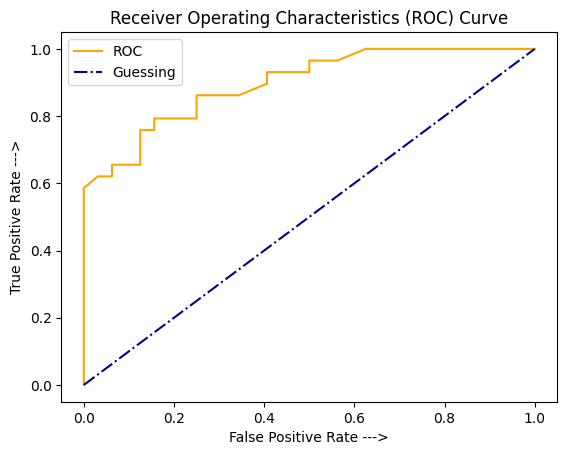

In [76]:
# create function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate tpr
    """

    plt.plot(fpr, tpr, color="orange", label="ROC")

    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="-.", label="Guessing")

    plt.xlabel("False Positive Rate --->")
    plt.ylabel("True Positive Rate --->")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8970905172413792)

` Confusion Matrix `

In [78]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[28,  4],
       [ 8, 21]])

In [79]:
# visualize the confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,28,4
1,8,21


![](confusion-matrix.jpg)

In [80]:
28 + 21 + 4 + 8

61

In [81]:
len(X_test)

61

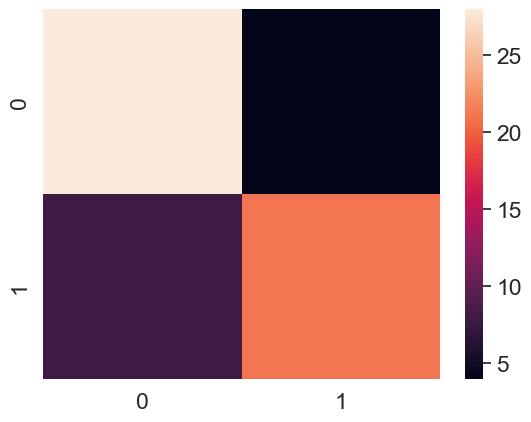

In [82]:
# make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

sns.set_theme(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

In [83]:
import sklearn
sklearn.__version__

'1.6.1'

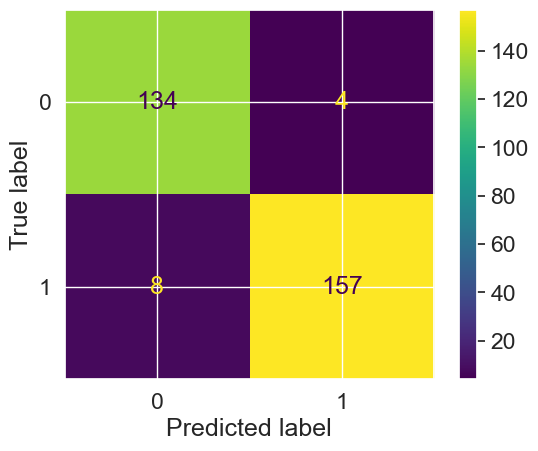

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

`Classification Report`

In [85]:
from sklearn.metrics import classification_report

print("classification report: \n", classification_report(y_test, y_preds))

classification report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.84      0.72      0.78        29

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### 4.2.2 Regression model evaluation metrics

The ones we're going to cover:
1. R^2 (r-squared) or coefficient of determination
2. Mean abosolute error (MAE)
3. Mean squared error (MSE)

`R-Squared / Coefficient of Determination`

In [86]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

# housing_df

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [87]:
model.score(X_test, y_test)

0.8067502686225223

In [88]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean[:10]

array([2.07425216, 2.07425216, 2.07425216, 2.07425216, 2.07425216,
       2.07425216, 2.07425216, 2.07425216, 2.07425216, 2.07425216])

In [89]:
r2_score(y_true=y_test, y_pred=y_test_mean) ## becasue we are doing it with "mean value"

0.0

In [90]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

`Mean Absolute Error (MAE)`

In [91]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3310936786337211

In [92]:
df = pd.DataFrame(data={"actual values" : y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
18726,0.98800,0.718940,-0.269060
1046,1.57200,1.231660,-0.340340
15508,1.60900,1.650390,0.041390
828,2.06500,2.436560,0.371560
19007,1.01700,1.246530,0.229530
10287,2.59400,2.758330,0.164330
4330,2.87500,2.101760,-0.773240
11387,2.11300,2.445230,0.332230
4603,5.00001,4.835358,-0.164652
18325,5.00001,4.957709,-0.042301


In [93]:
np.abs(df["differences"]).mean()

np.float64(0.3310936786337211)

`Mean Squared Error (MSE)`

In [94]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.2598024743631264

In [95]:
df["squared diff"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared diff
18726,0.988,0.71894,-0.26906,0.072393
1046,1.572,1.23166,-0.34034,0.115831
15508,1.609,1.65039,0.04139,0.001713
828,2.065,2.43656,0.37156,0.138057
19007,1.017,1.24653,0.22953,0.052684


In [96]:
df["squared diff"].mean()

np.float64(0.2598024743631264)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 18726 to 17547
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   actual values     4128 non-null   float64
 1   predicted values  4128 non-null   float64
 2   differences       4128 non-null   float64
 3   squared diff      4128 non-null   float64
dtypes: float64(4)
memory usage: 161.2 KB


### 4.2.3 Finally using `scoring parameter`

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(21)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [99]:
np.random.seed(21)

# cross-validation accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_accuracy

array([0.81967213, 0.86885246, 0.78688525, 0.83333333, 0.78333333])

In [100]:
# cross-validated accuracy:
print(f"The cross validated accuracy is: {np.mean(cv_accuracy)*100:.2f}%")

The cross validated accuracy is: 81.84%


In [101]:
np.random.seed(21)

cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_accuracy

array([0.81967213, 0.86885246, 0.78688525, 0.83333333, 0.78333333])

In [102]:
print(f"The cross validated accuracy is: {np.mean(cv_accuracy)*100:.2f}%")


The cross validated accuracy is: 81.84%


In [103]:
# Pricision
np.random.seed(20)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.9375    , 0.84375   , 0.8       , 0.74358974])

In [104]:
# cross-validated precison:
print(f"The cross validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross validated precision is: 82.97%


In [105]:
# Recall
np.random.seed(19)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.81818182, 0.84848485, 0.87878788])

In [106]:
# cross-validated recall:
print(f"The cross validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross validated recall is: 85.45%


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(21)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)


np.float64(0.6555102681113562)

In [108]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.52056452, -0.42252348, -0.50283369])

In [109]:
# mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
cv_mse

array([-0.51238411, -0.32872409, -0.54932664])

In [110]:
np.mean(cv_mae), np.mean(cv_mse)

(np.float64(-0.48197389595930235), np.float64(-0.46347828156249804))

In [111]:
what_we_are_learning

['01. Introduction to Scikit-Learn',
 '02. Getting the data ready',
 '03. Choose the right estimator/algorithm for our problem',
 '04. Fit the model/algorithm and use it to make predictions on our data',
 '05. Evaluating a model',
 '06. Improve a model',
 '07. Save and load a trained model',
 '08. Putting it all together']

## 4. Improving the model

from a data perspective:
* Could we collect more data? (generally, more data leads better performance)
* Could we improve our data?

from a model perespective:
* Is there a better model we can use?
* Could we improve the current model?(hyperparameter tuning)
<br>
![](right-estimator.png)
<br>

In [112]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust `hyperparamters`:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 4.1 Tuning hyperparamters by hand

In [113]:
# lets make 3sets : training, validation and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_preds labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precison = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                   "precision": round(precison, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precison*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")

    return metric_dict


In [114]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split it into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [116]:
# make a baseline predictions
y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 Score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

`n_estimators`

In [117]:
np.random.seed(21)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

y_preds = clf_2.predict(X_valid)

# evaluate the classifier on validation set
clf2_metrics = evaluate_preds(y_valid, y_preds)
clf2_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 Score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

`max_depth`

In [118]:
np.random.seed(21)

clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train, y_train)

y_preds = clf_3.predict(X_valid)

# evaluate the classifier on validation set
clf3_metrics = evaluate_preds(y_valid, y_preds)
clf3_metrics

Accuracy: 80.00%
Precision: 80.77%
Recall: 84.00%
F1 Score: 82.35%


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

![](abc2.jpg)

### 4.2 Hyperparameter tuning with RandomizedSearchCV


`RandomizedSearchCV` is a hyperparameter optimization technique that performs random search over a specified parameter space. Here are its key features and benefits: <br> <br>
Purpose: <br>
* It's used to find the best hyperparameters for a machine learning model
* Unlike GridSearchCV which tries all possible combinations, RandomizedSearchCV samples a fixed number of parameter settings from the specified distributions
<br><br>How it works: <br> <br>
* Takes a parameter space (dictionary of parameters and their possible values)
* Randomly samples a specified number of parameter combinations
* For each combination, it:
** Fits the model
** Performs cross-validation
** Evaluates the performance
* Returns the best parameter combination found
<br><br>Advantages over GridSearchCV:<br><br>
* More efficient than GridSearchCV when dealing with large parameter spaces
* Can find good parameters with fewer iterations
* Allows specification of continuous parameter distributions
* Less computationally expensive

In [119]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(21)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=None)

# Setup randomizedsearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.9s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200

In [120]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20}

In [121]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 78.05%
Recall: 94.12%
F1 Score: 85.33%


### 4.3 GridSearchCV Hyperparameter tuning

In [122]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [123]:
print("total parameters: ", 6 * 5 * 2 * 3 * 3)

total parameters:  540


In [124]:
# 5 times cv
540 * 5

2700

In [125]:
grid2 = {"n_estimators": [100, 200, 500],
        "max_depth": [20],
        "max_features": ["sqrt", "log2"],
        "min_samples_split": [6],
        "min_samples_leaf": [2, 4]}

3 * 1 * 2 * 1 * 2 * 5 # 5cv

60

In [126]:
from sklearn.model_selection import GridSearchCV

np.random.seed(21)
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=None)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid2, cv=5, verbose=2) # here no n_iter

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200

In [127]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [128]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision: 77.50%
Recall: 91.18%
F1 Score: 83.78%


### Lets compare our different model metrics

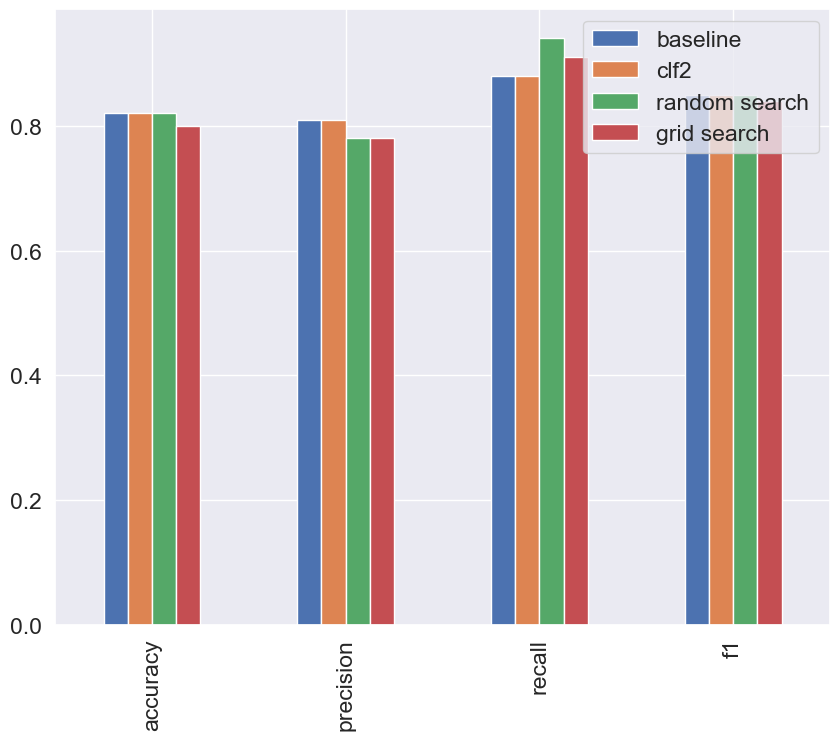

In [129]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf2": clf2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 5. Save and Load the trained model

Two ways: 
1. With Python's `pickle` module
2. With the `joblib` module

`pickle`

In [130]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model-1.pkl", "wb"))

In [131]:
# Load the model
loaded_pickle_model = pickle.load(open("gs_random_forest_model-1.pkl", "rb"))

# Make some prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 80.33%
Precision: 77.50%
Recall: 91.18%
F1 Score: 83.78%


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.91, 'f1': 0.84}

`joblib`

In [132]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_model-1.joblib");

In [133]:
loaded_joblib_model = load(filename="gs_random_forest_model-1.joblib")

# Make prediction
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 77.50%
Recall: 91.18%
F1 Score: 83.78%


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.91, 'f1': 0.84}

## 6. Putting all together

In [134]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [135]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [136]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [138]:
# all in one cell
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
np.random.seed(21)

data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ]
)

# creating preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# split the data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2117484728034944

Its also possible to use `GridSearchCV` or `RandomSearchCV` with out pipeline.

In [139]:
# use gridsearchcv with regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features" :["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [140]:
gs_model.score(X_test, y_test)

0.2764621472917048

In [141]:
what_we_are_learning

['01. Introduction to Scikit-Learn',
 '02. Getting the data ready',
 '03. Choose the right estimator/algorithm for our problem',
 '04. Fit the model/algorithm and use it to make predictions on our data',
 '05. Evaluating a model',
 '06. Improve a model',
 '07. Save and load a trained model',
 '08. Putting it all together']

# `Learnt Complete End to End Scikit-Learn Workflow`